In [1]:
!pip install imutils

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
from imutils import paths

In [8]:
img_paths = list(paths.list_images('datasets/animals/'))

In [11]:
import cv2
import matplotlib.pyplot as plt

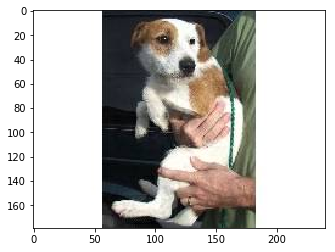

In [13]:
img = cv2.imread(img_paths[600])
plt.figure()
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

In [58]:
data = []
labels = []

In [17]:
import random

In [59]:
random.shuffle(img_paths)

In [29]:
p = 'datasets/animals/panda/panda_0001.jpg'
print(p)
print(p.split('/')[-2])

datasets/animals/panda/panda_0001.jpg
panda


In [60]:
for img_path in img_paths :
    img = cv2.imread(img_path)
    img = cv2.resize(img, (32, 32))
    label = img_path.split('/')[-2]
    data.append(img)
    labels.append(label)

In [35]:
import numpy as np

In [61]:
data = np.array(data)
labels = np.array(labels)

#Transform Array จาก สี่เหลี่ยม เป็น แนวนอน โดยใช้ reshape

In [62]:
data = data.reshape((3000, (32*32*3)))

Normalize data [0, 255] -> [0, 1] เพื่อให้ได้ผลดีขึ้น

In [63]:
data = data / 255.0

#Transform to One hot encoding

In [55]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [64]:
labels = lb.fit_transform(labels)
labels

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [65]:
lb.classes_

array(['cats', 'dogs', 'panda'], dtype='<U5')

In [67]:
lb.inverse_transform(np.array([[0,1, 0.7, 0.2]]))

array(['dogs'], dtype='<U5')

#Split Train 80% and Test 20%

In [70]:
from sklearn.model_selection import train_test_split

In [77]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=5)

In [82]:
print(x_train.shape, y_train.shape)

(2400, 3072) (2400, 3)


In [83]:
from sklearn.neural_network import MLPClassifier

In [84]:
mlp = MLPClassifier()

In [86]:
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

In [91]:
from sklearn.metrics import accuracy_score, classification_report

In [89]:
accuracy_score(y_test, y_pred)

0.48833333333333334

In [93]:
print(classification_report(y_test, y_pred, target_names=lb.classes_))

             precision    recall  f1-score   support

       cats       0.59      0.34      0.43       204
       dogs       0.49      0.53      0.51       200
      panda       0.76      0.70      0.73       196

avg / total       0.61      0.52      0.55       600

